In [1]:
import numpy as np 
import cv2

In [3]:
import cv2
import numpy as np
import time

# Initialize webcam
cap = cv2.VideoCapture(0)

# Set window name
cv2.namedWindow("Stylish Webcam", cv2.WINDOW_NORMAL)

# Frame processing mode
mode = 1  # 1: Normal, 2: HSV, 3: LAB, 4: Edge Detection

# FPS Calculation
prev_time = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Get dimensions
    width = int(cap.get(3))
    height = int(cap.get(4))

    # Apply transformations based on mode
    if mode == 2:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  # HSV Mode
    elif mode == 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2Lab)  # LAB Mode
    elif mode == 4:
        frame = cv2.Canny(frame, 100, 200)  # Edge Detection
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  # Convert to 3-channel
    
    # Create a colorful gradient overlay
    gradient = np.linspace(0, 255, width, dtype=np.uint8)
    gradient = np.tile(gradient, (height, 1))
    gradient = cv2.applyColorMap(gradient, cv2.COLORMAP_JET)

    # Blend with the frame for a cool effect
    frame = cv2.addWeighted(frame, 0.7, gradient, 0.3, 0)

    # FPS Calculation
    cur_time = time.time()
    fps = int(1 / (cur_time - prev_time)) if prev_time else 0
    prev_time = cur_time

    # Overlay text
    cv2.putText(frame, f"FPS: {fps}", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(frame, "Press 1: Normal | 2: HSV | 3: LAB | 4: Edges | Q: Quit", 
                (20, height - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Show frame
    cv2.imshow("Stylish Webcam", frame)

    # Key bindings
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key in [ord('1'), ord('2'), ord('3'), ord('4')]:
        mode = int(chr(key))

# Release resources
cap.release()
cv2.destroyAllWindows()


In [9]:
# Load the image from the specified path
image3 = cv2.imread('rgb.png',1)

# Check if the image was loaded successfully
if image3 is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Display the image in a window
    cv2.imshow('image3', image3)
    
    # Wait for a key press and close the window when any key is pressed
    cv2.waitKey(0)
    cv2.destroyAllWindows()

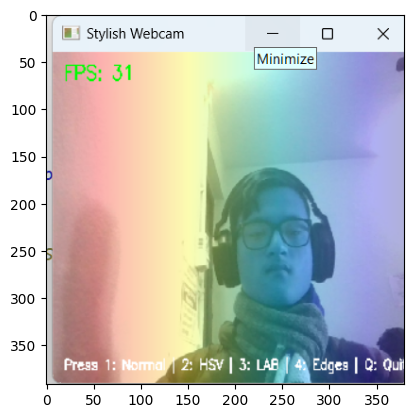

In [10]:
plt.imshow(image3)